# An Analysis of Kickstarter Campaigns
## Tyler Zarnik: github - atTlr

## Problem Statement

In accordance with Kickstarter’s continued efforts to operate as a “Benefit Corporation”,  the company is looking to take a data driven approach to continue to provide information that fosters more successful campaigns from creators on the platform. These data driven insights may be able to help creators understand what successful campaigns are doing right. There is also a desire to have this data predict which campaigns will be successful based on metrics of similar campaigns provided. 

---

## Executive Summary

---
 
The primary purpose of this project is to attempt to compile a comprehensive analysis of publicly available Kickstarter datasets with the goal to provide visualizations of the data as well as a machine learning model that will predict and give a probability of if the campaign will be successful. 

We will incorporate the python libraries pandas, numpy, and matplotlib for the Data Cleaning and Data Visualization steps of the project. Sklearn will be the library used for the machine learning model. We will be utilizing Amazon Web Services (AWS) to run and return our fitted model. A logistic regression will be used for the explanatory model while a random forest classifier will be used for a more predictive model. Natural Language Processing will additionally be used as further exogenous variables within our modeling pipeline as a way to incorporate the title and description of the Kickstarter Campaign as well.

The analysis will also incorporate current articles that have been pubished by Kickstarter themselves as 'best practices' for running a campaign. We will look to corroborate any of these 'best practices' if they can be shown through the data as well as provide our own reccomendations based on our model.

### Contents:

- [Preliminary Data On Kickstarter](#Preliminary-Data-On-Kickstarter)
- [Tips Normally Explaining Successful Campaigns](#Tips-Normally-Explaining-Successful-Campaigns)
- [Data Dictionary](#Data-Dictionary)
- [Data Collection](#Data-Collection)
- [Imports](#Imports)
- [Exploratory Data Analysis](#EDA)
- [Preprocessing & Modeling](#Preprocessing-&-Modeling)
- [Evaluation and Selection](#Evaluation-and-Selection)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

### Preliminary Data On Kickstarter

Before conducting the analysis, we find that it is neccessary to explain some of the facts nuances in the Kickstarter crowdfunding platform. The two main nuances that set Kickstarter apart from other plateforms are that Kickstarter does not offer a 'flexible' funding option and that Kickstarter only recieves money from a campaign if said campaign reachs its goals. For the US, kickstarter applies a 3-5% fee for credit card and PayPal processing, and take 5% for any successfully funded campaign. (https://www.kickstarter.com/articles/creative-projects-community-covid-19). This creates a unique situation as Kickstarter is incentivezed to help to cultivate and assist its campaign creators to reach the goals that it has set. When a campaign does not reach its chosen goal, no funds/pledges are collected or given to the creator by Kickstarter. As stated before this is markedly different from other platforms which offer 'flexible' funding options. Flexible funding options allow any funds that were pledge towards a goal to be collected by the creator with the caveat that any funds under the sepecified goal have a high percentage taken out by the crowdfunding comapny. 

Becuase of these nuances, Kickstarter has published via their blogs, different strategies and practices on what they see as actions taken by campaigns according to their data. According to Kickstarters stat page, Around 38% of all campaigns reach their goal (https://www.kickstarter.com/help/stats?ref=global-footer) this means that a few percentage points less than 2/3rds of all campaigns do not reach their goal. Interestingly, out of the 5.2 billion dollars requested by all campaigns launched on the site, 4.73 billion dollars have been collected by successfully funded projects. This could either indicate that the projects that get funded more often are campaigns with high goals or that campaigns that are successfully funded are often backed far above the suggested goal. 

### Tips Normally Explaining Successful Campiagns

After reading through Kickstarters blog and other related articles and op-eds about how to run successful campaigns, there are typically similar ideas that are presented in the articles. I will attempt to simplify and present these in a more broad view below:

> 1. __Have a Complete and Fleshed Out Kickstarter Page__ - 
    > Pages should have a picture, a well defined description, a timline, video, and personal touch.
    
> 2. __Projects should have clearly defined goals and incentives__ 

> 3. __Projects Should Engage with Backers Who Have Pledged__ - Make sure to follow up on pledge incentives. This keeps backers engaged and less liekly to move money to other campiagns or rescind the pledge entirely.

With the data that we were able to collect, from a cruesory glance, we do not believe that we will be able to definitively prove or disprove these claims. Rather we do hope that we can provide some additional data driven info to help bolster the tips above.

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|object|df|Identifing ID For Each Campaign|
|name|object|df|Name and Description of the Campaign|
|category|object|df|Subcategory Description of the Campaign|
|main_category|object|df|Category Of the Campaign|
|currency|object|df|Currency of Pledged Amount|
|launched|datetime|df|Date When Campaign Was Created and Started|
|deadline|datetime|df|Designated End Date of Campaign|
|pledged|float|df|Amount Pledged In Amount of Currency|
|usd_pledged|float|df|Trasnlated Amount Pledged in US Dollars|
|goal|float|df|Amount That Creator Needs To Complete Project|
|backers|int|df|Number of Users That Have Donated to the Campaign|
|country|object|df|Country In Which the Campaign is Taking Place|
|spotlight|object|df|If The Campaign Was Spotlighted on the Kickstarter Website|
|staff_pick|object|df|If the Campaign Was Endorsed by the Staff at Kickstarter|
|duration|int|df|Length In Days of Kickstarter Campaign|
|month_launched|object|df|Month in Which Campaign Was Launched|
|result|int|df|Whether the Campaign Reached The Goal Set|

## Data Collection

We collected our data from two sources, a Kaggle dataset as well as a collection of datasets from WebRobots.io. We have included a notebook that has the full process of the data cleaning and merging of datasets. Both datasets were cleared of any duplicates based on the campaign unique ID. This ensured that there was no overlap between the data sets gathered. There were several columns that were cleaned such as the 'name' and 'category' columns and the 'launched' and 'deadline' columns were adjusted to be datatime objects. Kickstarters stats page says that there have been 497,000 projects. Our dataset in total after cleaning and deleting duplicates round out to be around the 380,000 range. The time period of our data is from 2009 to July of 2020. While our data does not capture every single campiagn we do believe that it is representative of the campaign population as a whole.

### Imports

In [301]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [86]:
plt.style.use('seaborn-darkgrid')

## EDA

In [87]:
df = pd.read_csv('../data/total_kickstarter.csv')

We will first start by creating a pariplot to look at all of our numeric variables. Generally thi will give a sense of how our data is spread and visuals any overarching patterns.

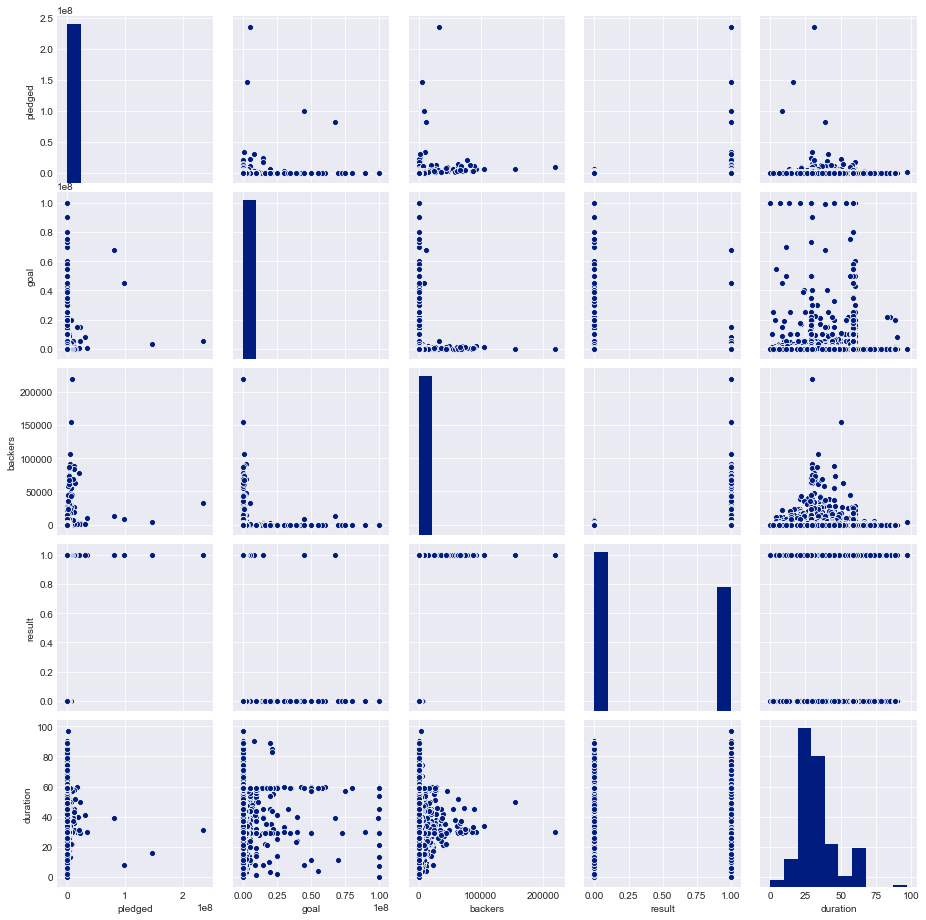

In [88]:
sns.pairplot(df[['pledged','goal','backers','result','duration']]);

The most important thing to notice from this quick pairplot is that our dataset is ripe with outliers. This is most evidently seen in the 'goal' vs 'pledged' plots. Our data is also clumped at some points. From a cursory look, the duration is the most evidently clumped data especially around the apparent 30 and 60 day marks. We can also see from our 'result' vs 'result' plot that there are more failed rather than successful campaigns. Below will will dig deeper on some of the more interesting plots.

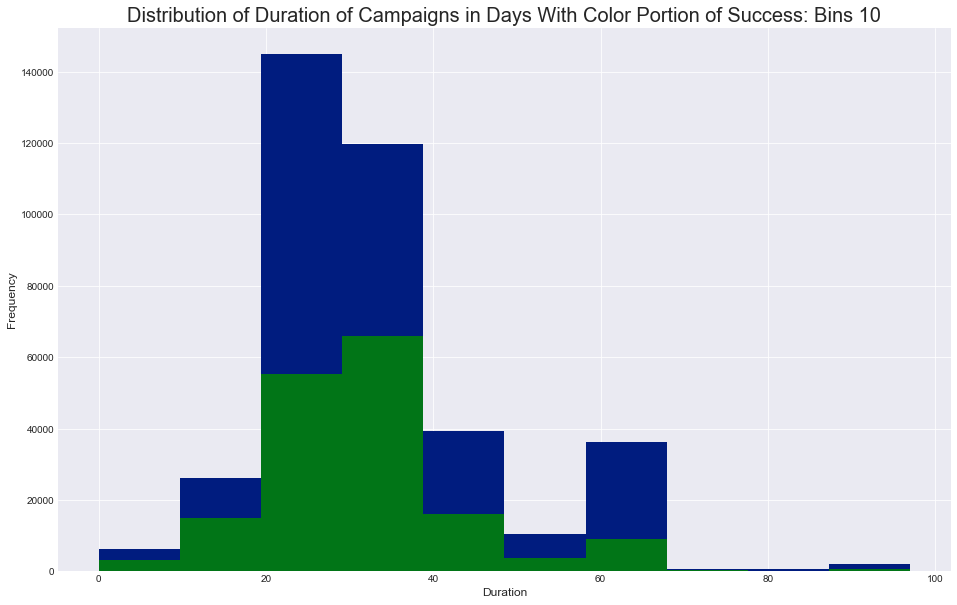

In [89]:
plt.figure(figsize = (16,10))
plt.hist(df['duration'])
plt.hist(df.loc[df['result']==1]['duration'])
plt.title('Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 10',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.tight_layout;

The graph above shows the distribution of the duration of campaigns. This graph seems to show that duration has a somewhat normal distribution. While it does have considerable right skew, the graph using 10 bins shows that most data is between the 20-40 day mark which would indicate that most campaigns last around the 30 day mark. We can see that visually, all bins have a similar percentage of successful campaigns which is denoted by the orange bar in the graph above. The plot below will adjust the amount of bins so that we can get a more accurate picture of the data.

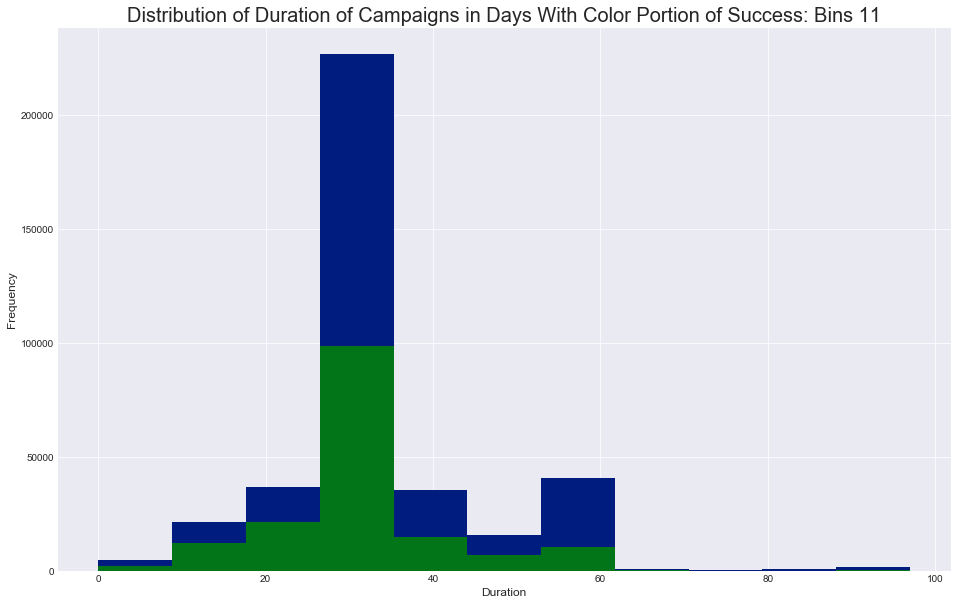

In [90]:
plt.figure(figsize = (16,10))
plt.hist(df['duration'],bins = 11)
plt.hist(df.loc[df['result']==1]['duration'],bins = 11)
plt.title('Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 11',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.tight_layout;

As we increased the number of bins, we can now start to see how most of the data is as previously hypothesized above, centered around the 30 day mark. Whereas success was relatively even across the duration earlier, now we can clearly see that 30 days and less have a high percentage of successful campaigns. At around 2 months, there is clearly a low point. Based on the evidence and suggestions given by Kickstarter, generally campaigns that are more successful are better planned from the beginning which have the clearly defined outline and are marketed well. Longer campaigns may suffer from lack of coordination and clear plan and probably rely on having a loger deadline to be a crutch to getting more funding. 

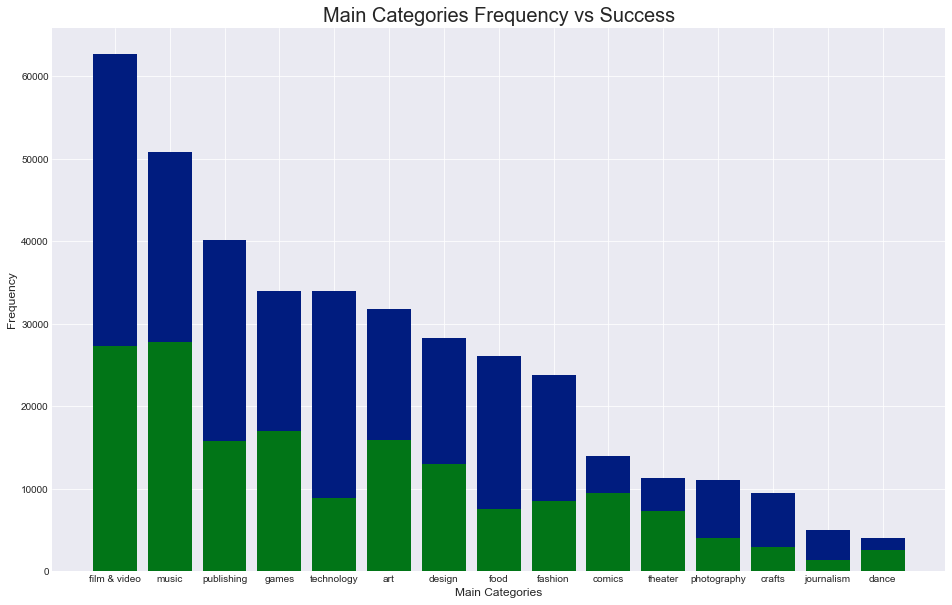

In [91]:
plt.figure(figsize = (16,10))
plt.bar(x = df['main_category'].value_counts().keys(), height = df['main_category'].value_counts())
plt.bar(x = df.loc[df['result']==1]['main_category'].value_counts().keys(), height = df.loc[df['result']==1]['main_category'].value_counts())
plt.xlabel('Main Categories', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Main Categories Frequency vs Success', fontsize = 20)
plt.tight_layout;

One topic that we often found that was not discussed, was the topic of how category influences success. Kickstarter clearly focuses on the idea of 'projects' and does not allow crowdfunding of medical or personal campaigns that are not directly tied with a business campaign or personal artistic/technology based campaign. This will inherently shape the type of demographics that frequent and back the site. Kickstarters data found that projects are not purely or even mostly funded by friends and family but rather people who are independent of the creators circle. While the categories are organized from larget to cmallest in terms of number of campaigns, this does not also suggest that the more common campaigns are the most succesfful. The most successful campiagn categories based on percentages are: comics, theater, dance, and music. the music category is the only category that would be considered a 'main' or 'large' category on the website. Technology, journalism, fashion, and food are the lowest categories upon visual inspection. 

This might indicate that there is a demographic of backers that are not being fully catered to. There may also be a marketshare that uses other crowdfunding websites for their funding of specific categories suchs as theater or dance. Without data to other crowdfunding sites we can only speculate at this moment.

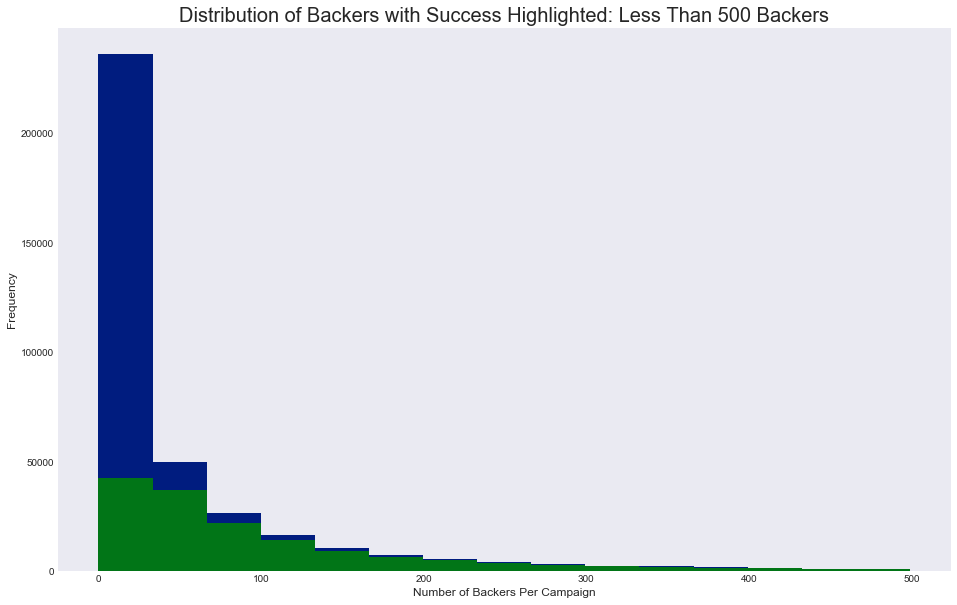

In [92]:
plt.figure(figsize = (16,10))
df.loc[(df['backers'] < 500)]['backers'].hist(bins = 15, grid = False)
df.loc[(df['backers']<500) & (df['result']==1)]['backers'].hist(bins = 15, grid = False)
plt.xlabel('Number of Backers Per Campaign',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Distribution of Backers with Success Highlighted: Less Than 500 Backers',fontsize = 20)
plt.tight_layout;

The above histogram shows that most campaigns that are successful are at least hitting the 50+ backer mark when the reach their goal. Assuming the distribution of goals is also extremely right skewed, than it would be safe to assume that campaigns that are successful in reaching their goal are funded by more lower pledging backers rather than fewer high pledging backers. This would inidcate that you do want to engage with as many people as possible rather than finding the 'white whale' backers who drop a far larger pledge.

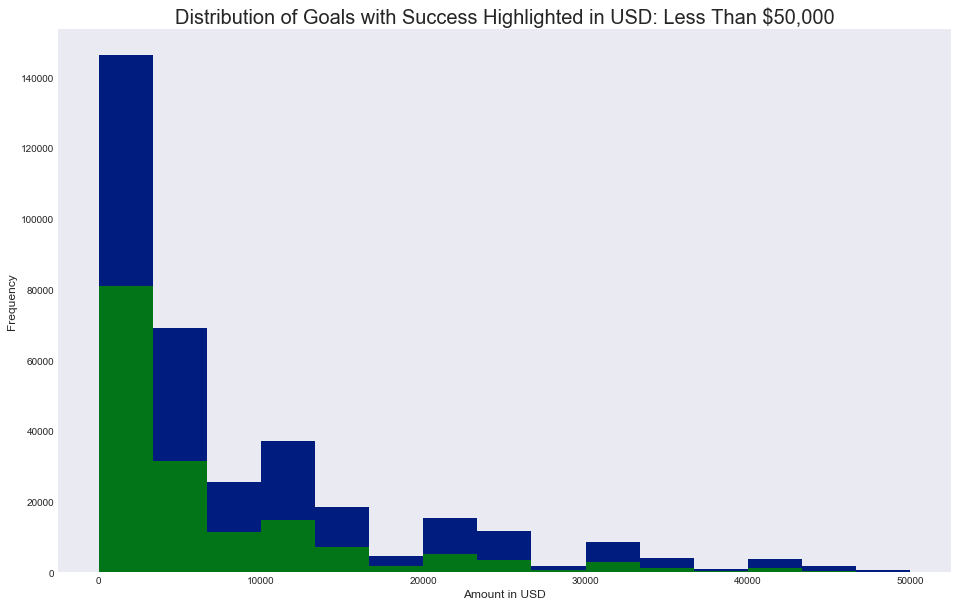

In [93]:
plt.figure(figsize = (16,10))
df[df['goal']<50000]['goal'].hist(bins = 15)
df[(df['goal']<50000)&(df['result']==1)]['goal'].hist(bins = 15,grid = False)
plt.xlabel('Amount in USD',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Distribution of Goals with Success Highlighted in USD: Less Than $50,000',fontsize = 20)
plt.tight_layout;

#### Repeat Creators

In continuation with the graph from above, the distribution of pledge goals is also heavily right skewed. However, it should be noted that it appears that after the initial more affordable less than $500 goals, most goals beyond that mark are percentage wise about as succesful at reaching their goal. This however does run counter to one of our observations earlier that most higher campaigns are funded according to the data from kickstaters stats page.

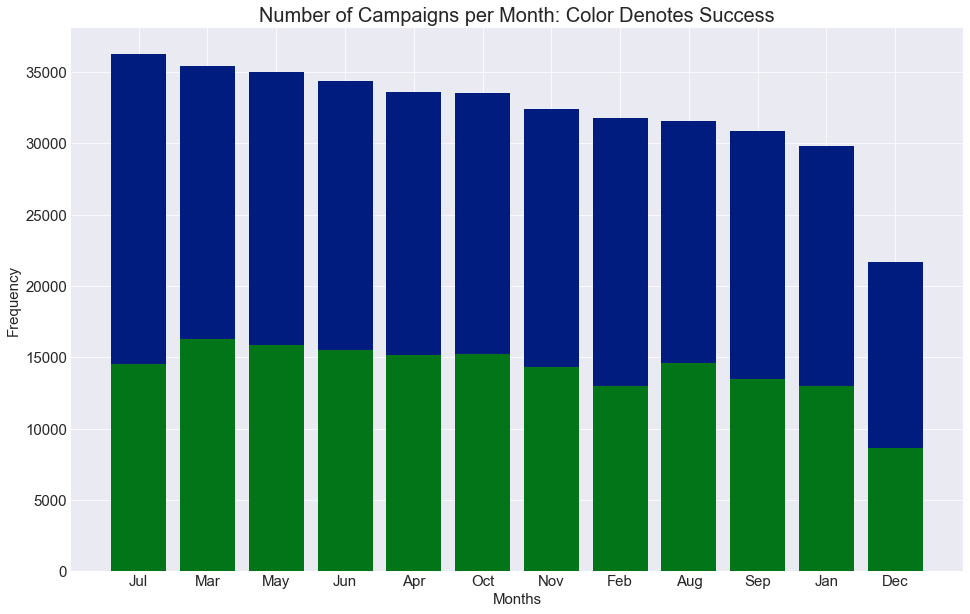

In [94]:
plt.figure(figsize = (16,10))
plt.bar(x = df['month_launched'].value_counts().keys(), height = df['month_launched'].value_counts())
plt.bar(x = df.loc[df['result']==1]['month_launched'].value_counts().keys(), height = df.loc[df['result']==1]['month_launched'].value_counts())
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Number of Campaigns per Month: Color Denotes Success', fontsize = 20)
plt.xticks(np.arange(12), (['Jul','Mar','May','Jun','Apr','Oct','Nov','Feb','Aug','Sep','Jan','Dec']),fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout;

Upon further researching the topic, we found articles similar to the one linked here (https://www.cnbc.com/2014/09/23/the-man-who-made-50-million-ditching-kickstarter.html) in which larger and repeat creators were leaving the platform. We wanted to identify if repeat creators contributed significantly to the overall revenue of the company or if it was more important to focus on bringing in newer creators at a faster rate. We created a dataset that grouped all creators by campaign with the math from the figures below.

In [30]:
udf = pd.read_csv('../data/unique_ks_up.csv')

In [31]:
gb_udf = udf.loc[udf['attempts']>1]

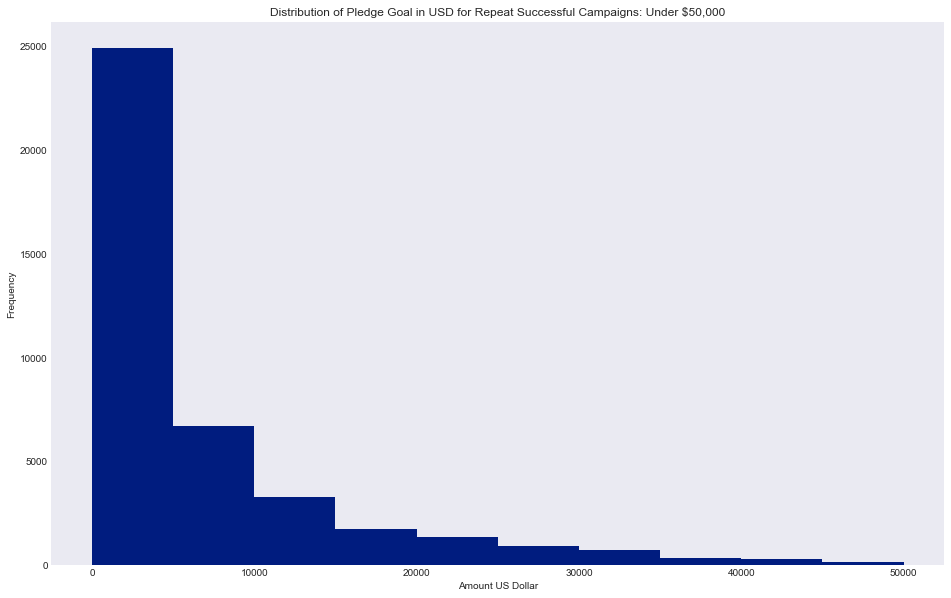

In [96]:
plt.figure(figsize = (16,10))
gb_udf[gb_udf['goal']<50000]['goal'].hist(grid = False)
plt.xlabel('Amount US Dollar')
plt.ylabel('Frequency')
plt.title('Distribution of Pledge Goal in USD for Repeat Successful Campaigns: Under $50,000')
plt.tight_layout;

In [46]:
print(f"Percentage of repeat creators that are successful more than 2/3 time: {round(len(gb_udf[gb_udf['success']> gb_udf['attempts']/2])/len(gb_udf),4)*100}")

Percentage of repeat creators that are successful more than 2/3 time: 65.0


In [41]:
print(f"Sum of campaigns from same creator that are always successful: {len(gb_udf[gb_udf['success']== gb_udf['attempts']])}")                                                                       

Sum of campaigns from same creator that are always successful: 23367


In [39]:
print(f"Total Revenue - repeat creators who campaigns are always successful: ${round(gb_udf[gb_udf['success']== gb_udf['attempts']]['usd_pledged'].sum(),2)}")

Total Revenue - repeat creators who campaigns are always successful: $650488914.57


In [50]:
print(f"Percentage of total revenue that always successful repeat creators contribute: {(round(gb_udf[gb_udf['success']== gb_udf['attempts']]['usd_pledged'].sum(),4) / 5_200_000_000)*100}")

Percentage of total revenue that always successful repeat creators contribute: 12.509402203269232


In [55]:
print(f"Percentage of Creators who are always successful: {(round(len(gb_udf[gb_udf['success']== gb_udf['attempts']])/497_280,2)*100)}")

Percentage of Creators who are always successful: 5.0


It seems that repeat creators do bring a considerable amount of revenue onto the platform. It does logically follow that creators who have succeeded with a campaign in the past will continue to succeed. These creators already have a following and understand the need as well as how to market the campaign so that it is successful. However, if a campaign starts to have a large enough audience, they might be able to save money by leaving the platform. 

In [101]:
print("General creator average amount of pledge in USD recieved: " + '$'+str(df['usd_pledged'].mean()))

General creator average amount of pledge in USD recieved: $10078.879333323574


In [103]:
print("Successful repeat creator average amount of pledge in USD recieved: " + '$' + str(gb_udf['usd_pledged'].mean()))

Successful repeat creator average amount of pledge in USD recieved: $17101.47009109193


Subsequently, repeat creators often recieve higher pledge amounts per campaign up to $7000 more on average. So there is incentive to make the process as simple as possible for first time users for the potential return of future bigger and better projects.

In [173]:
print("General creator average pledge goal: " + '$'+str(df['goal'].mean()))

General creator average amount of pledge in USD recieved: $44867.37575667025


In [174]:
print("Successful repeat creator average pledge goal: " + '$' + str(gb_udf['goal'].mean()))

Successful repeat creator average amount of pledge in USD recieved: $40394.36660485978


## Preprocessing and Modeling

Within the data cleaning notebook attached there is a dataset that has added the dummy variables for many of the numeric and categorical columns below.

### Baseline Accuracy

In [163]:
df['result'].value_counts(normalize = True)

0    0.561461
1    0.438539
Name: result, dtype: float64

We do have an imbalance in the dataset compared to the total percentage of success according to Kickstarter. However, we want our model to be able to predict better than just predicting the majority class, which in this instance is predicting that every campaign will fail at 56%.

### Logistic Regression

We want to use a logistic regression for our explanatory model. As part of our reccomendations, we want to deploy a model that will focus on certain features. Depending on the unique characteristics of a creators campaign, specific advice for best practices can be tailored to the particular campaign. We will demonstrate below that a logistic regression does have accuracy as well as explanatory power.

In [215]:
df = pd.read_csv('../data/no_cvec_kickstarter.csv')

In [250]:
df.dropna(inplace=True)

In [251]:
X = df.drop(columns = ['result','pledged','usd_pledged','launched','deadline','id'])

In [252]:
y = df['result']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [254]:
col_transformer = make_column_transformer(
    (CountVectorizer(), 'name'), 
    remainder = "passthrough"
)

pipe = Pipeline([
    ("col_trans", col_transformer),
    ("log_reg", LogisticRegression())
])

pipe_params = {
    # Digging through transformers
    'col_trans__countvectorizer__ngram_range': [(1,1),(1,2)],
    'col_trans__countvectorizer__max_features': [100, 200],
    
    "log_reg__C" : [1, 5],
    "log_reg__max_iter":[1000]
}

gs = GridSearchCV(pipe, pipe_params, cv = 3)

gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('col_trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('countvectorizer',
                                                                         CountVectorizer(analyzer='word',
                                                                                         binary=False,
                                                                                         decode_error='strict',
                                                                                         dtype=<class 'numpy.int64'>,
                 

In [255]:
gs.score(X_train, y_train)

0.9100315805822562

In [256]:
gs.score(X_test, y_test)

0.9110883318319718

### Random Forest

For stronger predictive power, we have also deployed a Random Forest model. We can still derive some interpretability from the model. Depeding on the results we will still most likely deploy the logistic regression due to its interpretability.

In [231]:
rf = RandomForestClassifier(max_depth = 25,random_state = 42,n_estimators = 40)

In [232]:
X = df.drop(columns = ['result','pledged','usd_pledged','launched','deadline','id','name'])

y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [233]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [234]:
rf.score(X_train,y_train)

0.9672838973544791

In [235]:
rf.score(X_test,y_test)

0.9577237287609107

In [236]:
rf_preds = rf.predict(X_test)

In [237]:
metrics.accuracy_score(y_test,rf_preds)

0.9577237287609107

In [238]:
%%time
cross_val_score(rf,X_train,y_train).mean()

CPU times: user 1min 22s, sys: 2.14 s, total: 1min 24s
Wall time: 1min 25s


0.9569917338257372

In [239]:
rf_coef_dict = {}
for coef, feat in zip(rf.feature_importances_.flatten(),X_train.columns):
    rf_coef_dict[feat] = coef

In [246]:
rf_coef_df = pd.DataFrame(rf.feature_importances_.flatten(),X_train.columns)

In [247]:
rf_coef_df.rename(columns = {0:'feature_importance'},inplace = True)

In [249]:
rf_coef_df.sort_values('feature_importance',ascending = False).head(5)

,feature_importance
backers,0.368468
spotlight_yes,0.238106
spotlight_no,0.130237
goal,0.059814
staff_pick_unknown,0.040306


## Evaluation and Selection

While both model performed well above the baseline accuracy, the best model to deploy for our reccomendation is our logistic regression. We will identify the most relevant coefficients from our model as well look at the confusion matrix to test for sensitivity and specificity.

In [298]:
preds = gs.predict(X_test)

In [302]:
confusion_matrix(y_test,
                 preds)

array([[52429,  2003],
       [ 6584, 35563]])

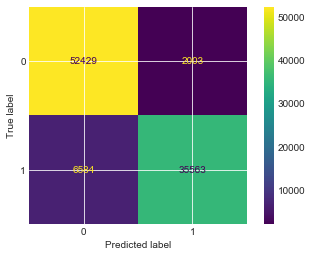

In [304]:
plot_confusion_matrix(gs, X_test, y_test, values_format='d');

In [305]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [306]:
spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9632


In [307]:
sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.8438


In [285]:
coef_dict = {}
for coef, feat in zip(gs.best_estimator_.named_steps['log_reg'].coef_.flatten(),X_train.columns):
    coef_dict[feat] = coef

In [286]:
for k ,v in coef_dict.items():
    coef_dict[k] = np.exp(v)

In [297]:
sorted([(v,k) for k,v in coef_dict.items()],reverse = True)[1:10]

[(2.673006448609378, 'category_performance art'),
 (2.6005945428197808, 'duration_26'),
 (2.35162292056694, 'duration_39'),
 (1.7455319587930413, 'category_live games'),
 (1.736507664867232, 'category_pop'),
 (1.6585301031869841, 'category_nature'),
 (1.5930337739685918, 'staff_pick_yes'),
 (1.5499995774682036, 'category_electronic music'),
 (1.5435872040153689, 'main_category_journalism')]

For a 1 unit increase in category_performance art, we expect that a creator is 2.6 times as likely to successfully reach their goal, ceteris paribus.

For a 1 unit increase in category_pop, we expect that a creator is 1.7 times as likely to successfully reach their goal, ceteris paribus.

For a 1 unit increase in staff_pick_yes, we expect that a creator is 1.54 times as likely to successfully reach their goal, ceteris paribus.

Our logistic regression model is not optimized for snesitivity. It often predicts that campaigns will not be successful when they will end up being successful. Between prioritizing sensitivity or specificity, in this scenario we believe its better to identify something as a false negative rather than predict that it will be successful. This will provoke creators to want to improve and create more outreach for their campaign.

## Conclusion and Recommendations

Deploy a model that will be able to return the probability that a campaign will succeed based on simple stats such as backer count, duration, title/description, goal, and current pledged amount.
With the deployed logistic regression, it can give specific tailored information on best ways to move forward with the strongest coefficients.
Incentivize repeat creator projects. Give lower percentages to creators who consistently produce successful campaigns. 
Work to give more spotlight to newer campaigns and encourage past successful creators to re-engage with the platform with discount percentage incentives.


As revenue for the company is derived directly from the success of its creators, Kickstarter has an incentive to invest in its creators as much as possible. 
While there are great resources provided by Kickstarter on best practices and beginners info, this info sometimes is not directly tailored to a customer.
Creating and deploying a model that is able to give a predicted probability of success as well as identify important features of successful campaigns, will aid new creators to be successful. 
As seen, creators that have successful campaigns will also be more likely to have future successful campaigns which also often get more pledge USD per campaign.


## References

- https://www.kickstarter.com/help/stats?ref=global-footer
- https://www.forbes.com/sites/jaredhecht/2020/08/31/is-crowdfunding-a-good-option-for-businesses-during-the-pandemic/#3184ee5565f0
- https://www.kickstarter.com/charter?ref=global-footer
- https://www.cnbc.com/2014/09/23/the-man-who-made-50-million-ditching-kickstarter.html
